# Data Cleaning

## Abalone Dataset

In [32]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer


#Loading the data set
data = pd.read_csv('../data/raw/abalone-1.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
print("Data Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [34]:

print("\n\nDescriptive Statistics:")
data.describe()



Descriptive Statistics:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [35]:
# Checking For Duplicates
print('Duplicated Rows: ', data.duplicated().sum())

Duplicated Rows:  0


In [36]:
# Checking for null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [37]:
#Checking for 0 or negative values in continuous variables

# Array of continuous variables
continuous_vars = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 2
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


In [38]:
#Removing rows with 0 or negative values in continuous variables
data = data[(data[continuous_vars] > 0).all(axis=1)]

# Checking for 0 or negative values in continuous variables
for vars in continuous_vars:
    print("0 or Negative values in", vars, ":", (data[vars] <= 0).sum())
    

0 or Negative values in Length : 0
0 or Negative values in Diameter : 0
0 or Negative values in Height : 0
0 or Negative values in Whole weight : 0
0 or Negative values in Shucked weight : 0
0 or Negative values in Viscera weight : 0
0 or Negative values in Shell weight : 0
0 or Negative values in Rings : 0


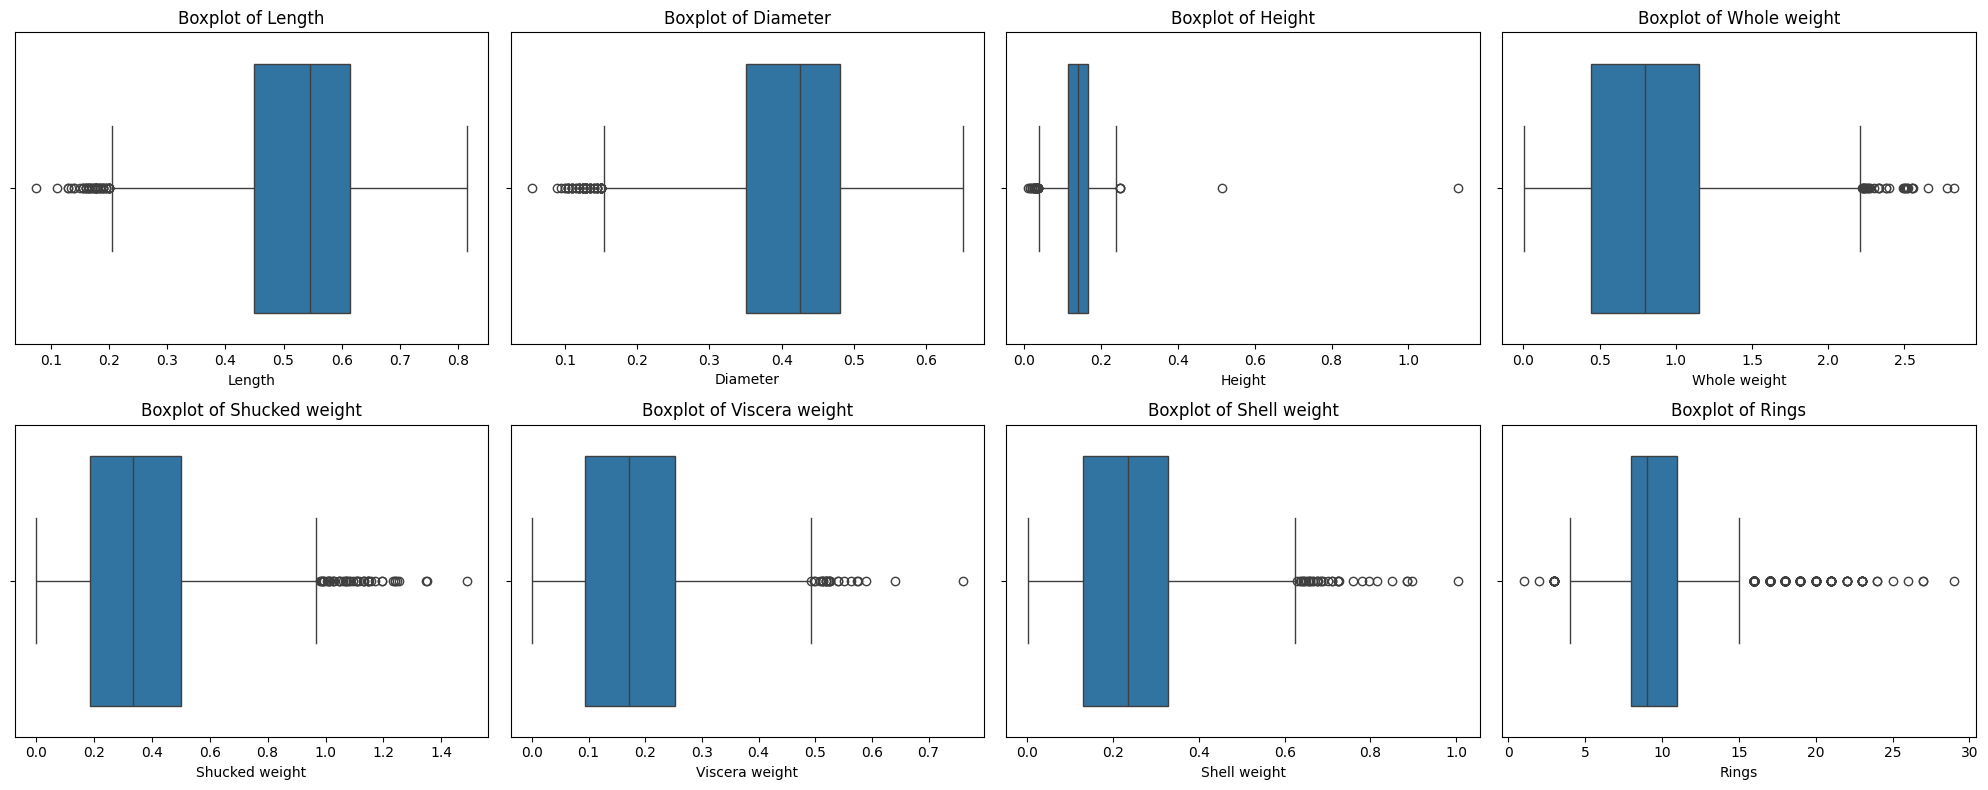

In [39]:
# Checking for outliers using boxplot

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.boxplot(x=data[var], ax=axes[i])
    axes[i].set_title(f"Boxplot of {var}")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

#### Comment

There is extreme outlier for Height, which can be removed using Z-Score Method

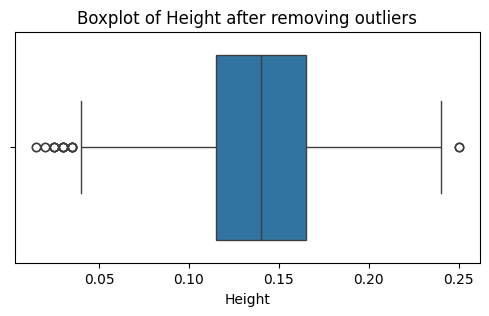

In [40]:
# Removing Outlier for Height using Z-score method

z_scores = stats.zscore(data['Height'])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

# Checking for outliers again using boxplot for Height
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Height'])
plt.title("Boxplot of Height after removing outliers")
plt.show()


In [41]:
cleaned_data = data.copy()

In [42]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)

### 1a. Comment 
#### Data Overview
- The dataset contains 4173 entries with 10 columns.
- After cleaning, the dataset was reduced to 4168 entries.
- The columns include measurements of abalone and their respective ages.

#### Data Cleaning
- No null values were present in the dataset.
- Duplicate rows were not found.
- Rows with 0 or negative values in continuous variables were removed.
- An extreme outlier was removed from Height variable using the Z-Score method

In [43]:
cleaned_data.to_csv('../data/processed/abalone.csv', index=False)

## Chacon et al Dataset

In [44]:
# Load the dataset
data_q3 = pd.read_csv("../data/raw/data_q3Updated.csv")

data_q3.head()


,Country,VA,PS,GE,RQ,RL,CR,Num of Students in Top 1000 Universities,Percentage(%),Top200,...,Tertiary Percentage,ISCED5,ISCED6,ISCED7,ISCED8,TL,TLID,TLAp,TLRd,Income_group
0,Argentina,59.11,45.89,50.98,25.59,33.33,43.33,536958.0,16.155881,3.53,...,92.107127,18.10,68.24,8.37,0.74,47.5,48.0,51.0,47.5,Upper middle income
1,Australia,94.23,80.29,93.88,96.60,95.22,94.23,808734.0,45.069809,16.88,...,83.050766,25.41,65.59,21.33,3.62,15.0,30.0,17.0,5.5,High income
2,Austria,93.60,89.10,93.10,91.71,97.18,92.47,129451.0,30.599529,12.06,...,71.220253,15.08,40.31,27.13,3.96,4.0,3.5,13.0,14.0,High income
3,Belgium,93.03,73.91,92.34,87.25,88.94,90.40,187459.0,36.104520,22.65,...,72.090119,3.40,58.11,16.00,2.63,12.5,8.0,16.5,18.0,High income
4,Brazil,62.07,36.97,50.71,54.55,46.50,56.46,738221.0,8.296570,1.09,...,55.001197,0.00,53.31,1.08,0.73,58.5,50.5,48.0,61.5,Upper middle income


In [45]:
data_q3.shape

(60, 25)

In [46]:
data_q3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   60 non-null     object 
 1   VA                                        60 non-null     float64
 2   PS                                        60 non-null     float64
 3   GE                                        60 non-null     float64
 4   RQ                                        60 non-null     float64
 5   RL                                        60 non-null     float64
 6   CR                                        60 non-null     float64
 7   Num of Students in Top 1000 Universities  56 non-null     float64
 8   Percentage(%)                             56 non-null     float64
 9   Top200                                    56 non-null     float64
 10  Top201-500                              

In [47]:
#Checking for null values
data_q3.isnull().sum()


Country                                      0
VA                                           0
PS                                           0
GE                                           0
RQ                                           0
RL                                           0
CR                                           0
Num of Students in Top 1000 Universities     4
Percentage(%)                                4
Top200                                       4
Top201-500                                   4
Top501-800                                   4
Top801-1000                                  4
Number in tertiary education                 0
Tertiary Education Age Population            2
Tertiary Percentage                          2
ISCED5                                      13
ISCED6                                       8
ISCED7                                       8
ISCED8                                       8
TL                                           0
TLID         

In [48]:
# Checking for total rows to be removed for na values
total_na_rows = data_q3.isnull().any(axis=1).sum()
print("Total rows to be removed for NA values:", total_na_rows)

print(((total_na_rows/data_q3.shape[0])*100), "% of data will be removed for NA values")

Total rows to be removed for NA values: 18
30.0 % of data will be removed for NA values


#### Comment
30% of the data will be removed, if we drop NA rows. As we don't have rows, model-based rows may not be accurate. Therefore, best option is  Mean Imputation

In [49]:
df_q3 = data_q3.copy()

meta_cols = df_q3[['Country', 'Income_group']]
df_numeric = df_q3.drop(columns=['Country', 'Income_group'])

# Apply mean imputation to numeric columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Reattach Country and Income_group for future use (not included in clustering)
df_cleaned = pd.concat([meta_cols, df_imputed], axis=1)

data_q3 = df_cleaned.copy()
data_q3.isna().sum()

Country                                     0
Income_group                                1
VA                                          0
PS                                          0
GE                                          0
RQ                                          0
RL                                          0
CR                                          0
Num of Students in Top 1000 Universities    0
Percentage(%)                               0
Top200                                      0
Top201-500                                  0
Top501-800                                  0
Top801-1000                                 0
Number in tertiary education                0
Tertiary Education Age Population           0
Tertiary Percentage                         0
ISCED5                                      0
ISCED6                                      0
ISCED7                                      0
ISCED8                                      0
TL                                

In [50]:
# Removing 1 row with NA value in Income_group
data_q3.dropna(inplace=True)
data_q3.isna().sum()

Country                                     0
Income_group                                0
VA                                          0
PS                                          0
GE                                          0
RQ                                          0
RL                                          0
CR                                          0
Num of Students in Top 1000 Universities    0
Percentage(%)                               0
Top200                                      0
Top201-500                                  0
Top501-800                                  0
Top801-1000                                 0
Number in tertiary education                0
Tertiary Education Age Population           0
Tertiary Percentage                         0
ISCED5                                      0
ISCED6                                      0
ISCED7                                      0
ISCED8                                      0
TL                                

In [51]:
data_q3.shape

(59, 25)

In [ ]:
# Checking for duplicates

print("Duplicated Rows: ", data_q3.duplicated().sum())

Duplicated Rows:  0


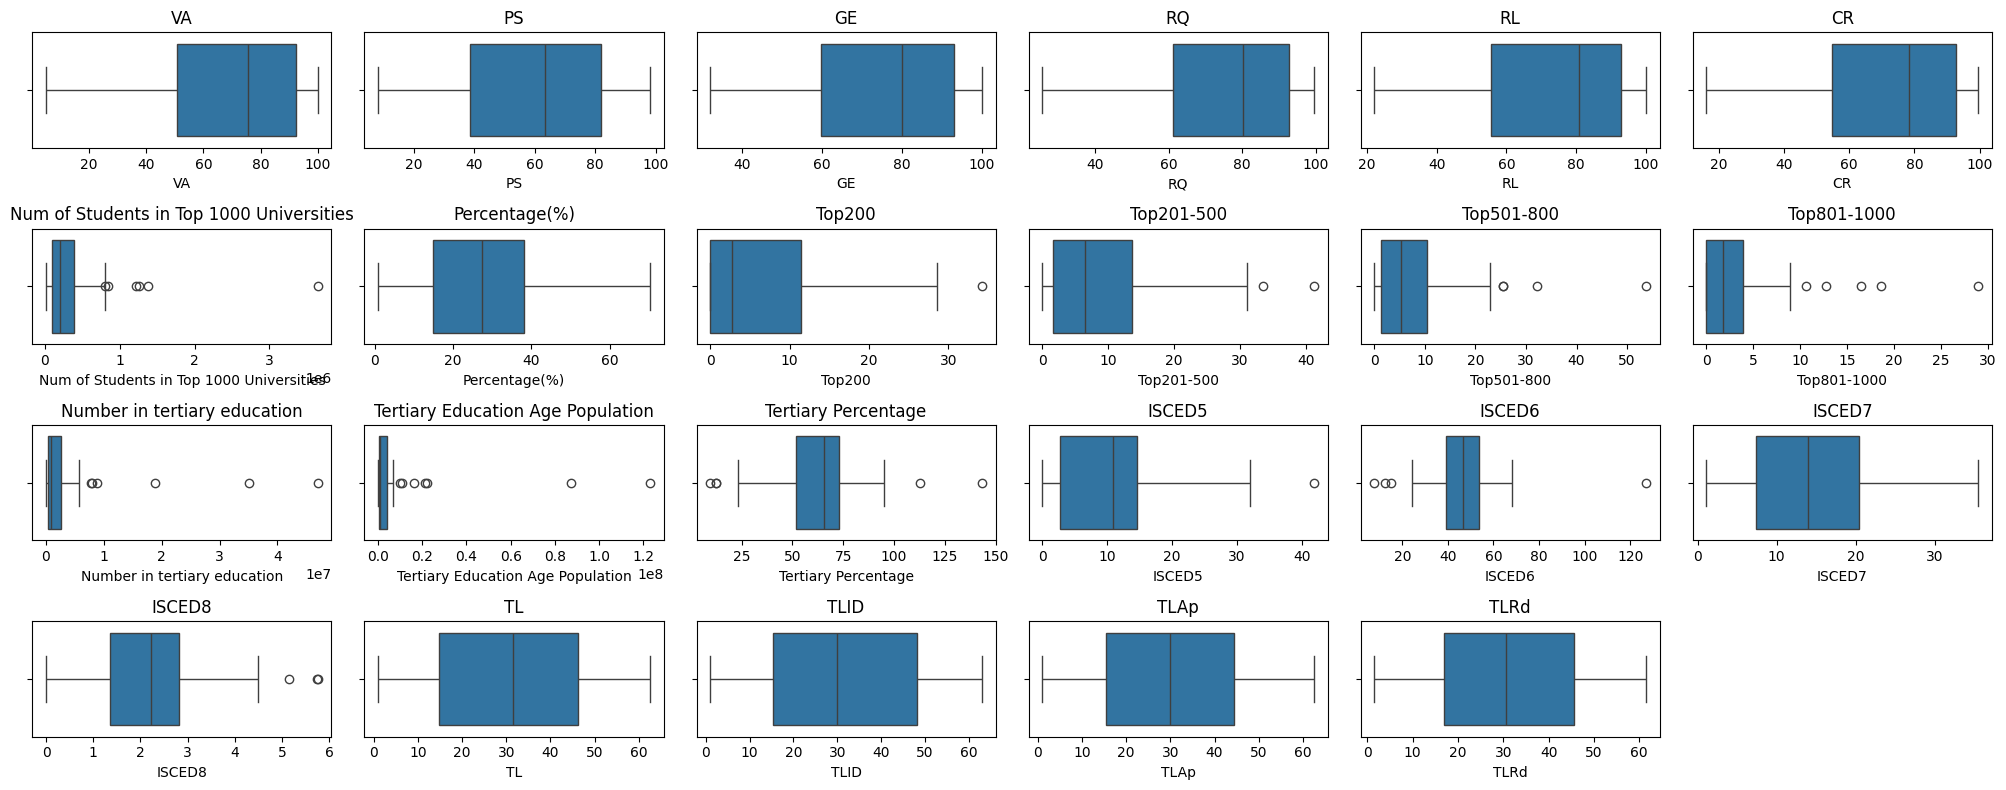

In [60]:
# Checking for Outliers using boxplot

df_q3 = data_q3.copy()
df_q3.drop(columns=['Country', 'Income_group'], inplace=True)
num_rows = len(df_q3.columns) // 6 + (len(df_q3.columns) % 6 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=6, figsize=(20, num_rows * 2)) 
axes = axes.flatten()

for i, var in enumerate(df_q3.columns):
    sns.boxplot(x=df_q3[var], ax=axes[i])
    axes[i].set_title(f"{var}")
\
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



### 3a. Comment
- Used mean imputation to handle missing numeric values (to avoid dropping ~30% of rows)
- Dropped 1 row with missing Income_group
- No duplicates found
- Outliers retained as they reflect real-world variability in country-level data

In [54]:
# Exporting the cleaned data
data_q3.to_csv('../data/processed/data_q3_cleaned.csv', index=False)

# Data Exploration

In [55]:
data = pd.read_csv('../data/processed/abalone.csv')

Text(0, 0.5, 'Frequency')

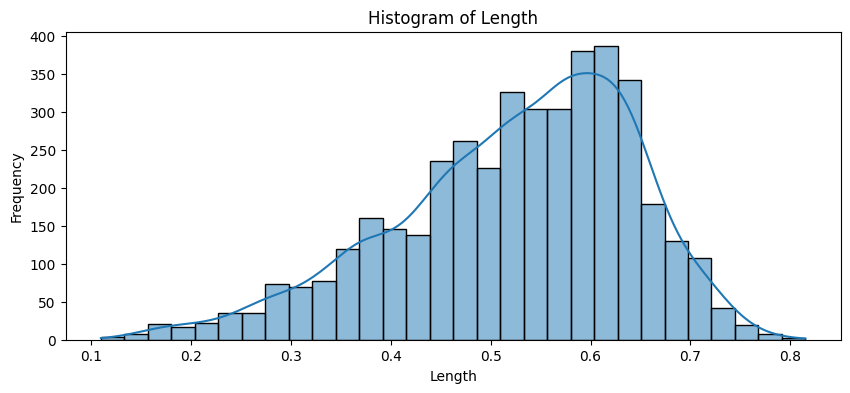

In [ ]:
plt.figure(figsize=(10, 4))

# Histogram
sns.histplot(data['Length'], bins=30, kde=True)
plt.title("Histogram of Length")
plt.xlabel("Length")
plt.ylabel("Frequency")


In [57]:
# Getting lenght statistics
data['Length'].describe()

count    4172.000000
mean        0.524145
std         0.119873
min         0.110000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length, dtype: float64

In [62]:
print("Median for Length: ",data['Length'].median())

Median for Length:  0.545




### 1b. Comment
#### Distribution of Length

- **Centre**:  
  The mean and median of Length are close, **0.52 and 0.55**, suggesting a fairly symmetric central tendency.

- **Dispersion**:  
  Values range from approximately **0.1 to 0.8**, showing a moderate spread. Most observations lie between **0.4 and 0.7**.

- **Shape**:  
  The histogram shows a **slight left skew**, meaning there are more values concentrated on the higher end, with a longer tail toward the lower end.

- **Outliers**:  
  The histogram suggests, there may be **lower-end outliers** above 0.15, but they are not extreme or frequent.




## Exploring Multicollinearity

<Axes: >

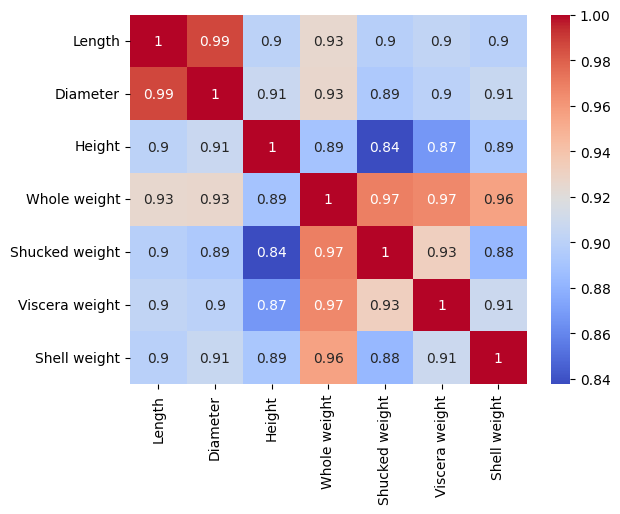

In [63]:
#Predictors for the model
predictors = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

#Correlation matrix
corr_matrix = data[predictors].corr() 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### 1c. Evidence of Multicollinearity

#### Observations from the Correlation Heatmap:
- There is extremely high correlation between `Length` and `Diameter` (0.99), meaning they are almost interchangeable.
- Similarly, `Length` also has high correlations (>= 0.9) with `Height`, and Weight measures
- The weight variables also strongly correlate with each other (> 0.90).
- Overall: All the continuos variables have correlations exceeding 0.84, which is still a high number


